In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sys
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Adicionar o diretório 'database' ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../Banco_de_dados')))
from db import get_all_data

#### Engajamento

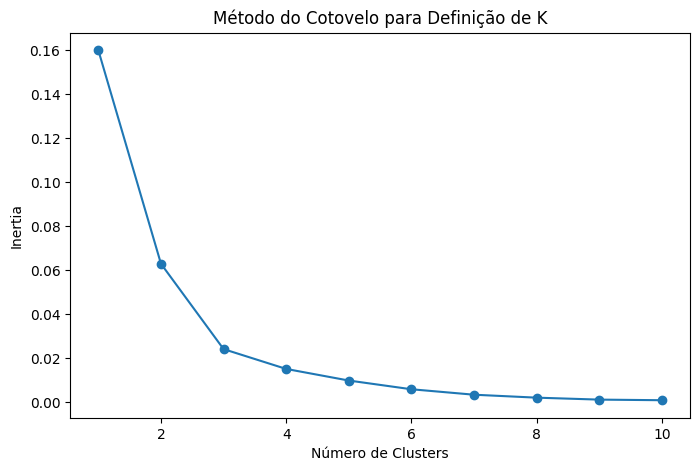

In [10]:


data = get_all_data("../Banco_de_dados/videos_data.db","links","likes","views")
df = pd.DataFrame(data, columns=["ID", "likes", "views"])
df['engajamento'] = df['likes'] / df['views']

# Definir um intervalo de clusters para testar
num_clusters = range(1, 11)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['engajamento']])
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para Definição de K')
plt.show()


#### Captions

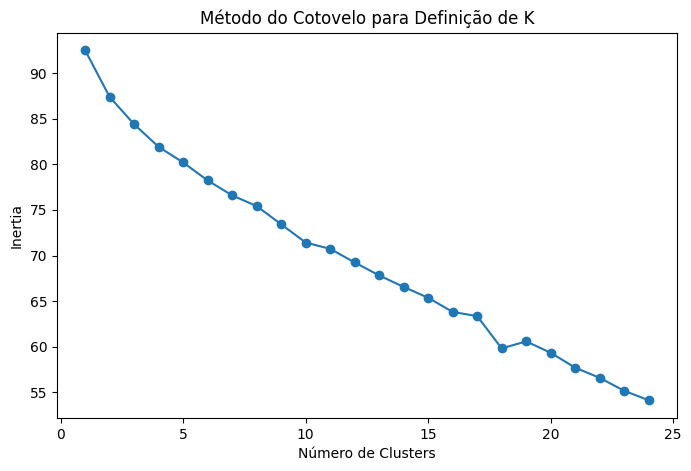

In [7]:
data = get_all_data("../Banco_de_dados/videos_data.db","captions","captions_normalizado","VideoID")
df = pd.DataFrame(data, columns=["ID", "captions", "VideoID"])

grouped_frames = df.groupby("VideoID")["captions"].apply(list).reset_index()
grouped_frames['captions'] = grouped_frames['captions'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(grouped_frames['captions'])

# Definir um intervalo de clusters para testar
num_clusters = range(1, 25)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para Definição de K')
plt.show()

#### Transcrições

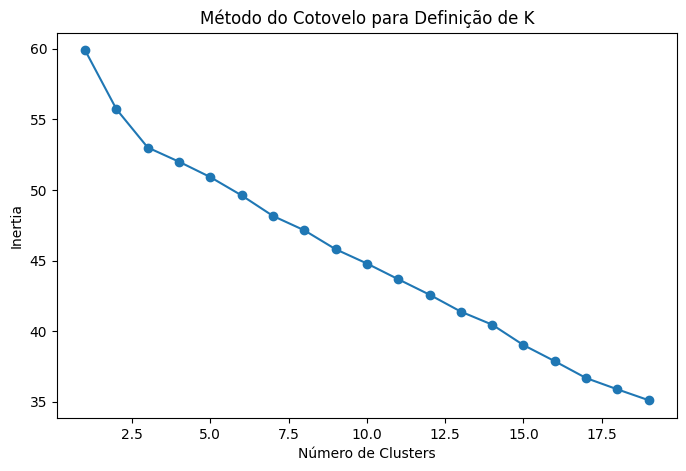

In [9]:
data = get_all_data("../Banco_de_dados/videos_data.db","transcripts","transcription_normalizado")
df = pd.DataFrame(data, columns=["ID", "transcription"])
df_filtered = df[df['transcription'] != '']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['transcription'])

# Definir um intervalo de clusters para testar
num_clusters = range(1, 20)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para Definição de K')
plt.show()

#### Global

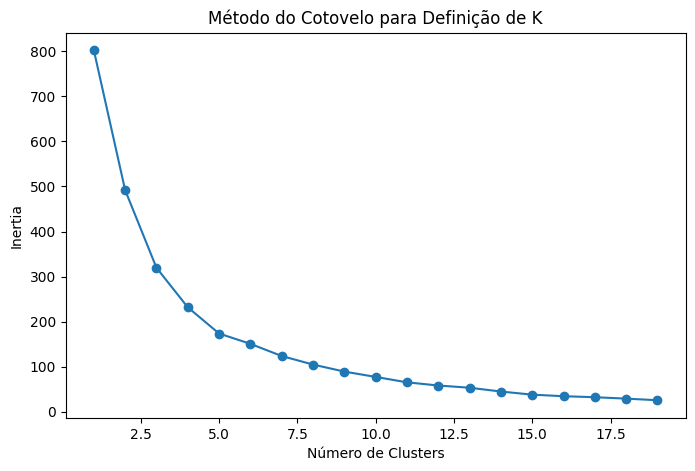

In [3]:
data = get_all_data("../Banco_de_dados/videos_data.db","video_clusters","cluster_engage","cluster_transcript","cluster_caption")
df = pd.DataFrame(data, columns=["ID", "cluster_engage", "cluster_transcript", "cluster_caption"])

# Definir um intervalo de clusters para testar
num_clusters = range(1, 20)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['cluster_engage', 'cluster_transcript', 'cluster_caption']])
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para Definição de K')
plt.show()